<a href="https://colab.research.google.com/github/annakl97/NGG6050/blob/main/LeonardAnna_CorrCoeff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ChatGPT conversation: https://chat.openai.com/share/e998f254-5eb4-4fba-8179-f1c28bb8256b

### 1\. Plot X vs Y. Do they look related?

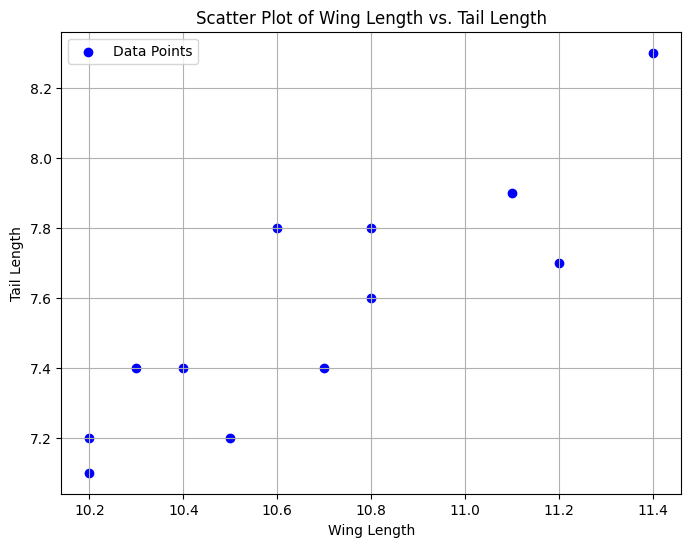

In [1]:
import matplotlib.pyplot as plt

# Data
wing_lengths = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_lengths = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(wing_lengths, tail_lengths, c='blue', marker='o', label='Data Points')
plt.title('Scatter Plot of Wing Length vs. Tail Length')
plt.xlabel('Wing Length')
plt.ylabel('Tail Length')
plt.grid(True)
plt.legend()
plt.show()


### 2. Calculate  𝑟𝑋,𝑌  and  𝑟𝑌,𝑋 , first using the equations above and then using either the Python numpy function corrcoef or Matlab's built-in corrcoef. Did you get the same answers?

In [3]:
# r(X,Y)

def calculate_mean(data):
    return sum(data) / len(data)

def calculate_covariance(x, y):
    n = len(x)
    if n != len(y):
        raise ValueError("Input lists must have the same length")

    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)

    covariance = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))

    return covariance / (n - 1)  # Divide by (n-1) for sample covariance

def calculate_standard_deviation(data):
    n = len(data)
    if n <= 1:
        return 0.0

    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)  # Sample variance
    return variance ** 0.5  # Standard deviation is the square root of variance

def calculate_pearson_correlation(x, y):
    cov = calculate_covariance(x, y)
    std_dev_x = calculate_standard_deviation(x)
    std_dev_y = calculate_standard_deviation(y)

    if std_dev_x == 0 or std_dev_y == 0:
        return 0  # Avoid division by zero if one of the standard deviations is 0

    correlation = cov / (std_dev_x * std_dev_y)
    return correlation

# Data
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate Pearson's correlation coefficient
correlation_coefficient = calculate_pearson_correlation(x, y)
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")

# r(Y,X) (what I actually adjusted here was just changing which dataset was y and which was x at the end)

def calculate_mean(data):
    return sum(data) / len(data)

def calculate_covariance(x, y):
    n = len(x)
    if n != len(y):
        raise ValueError("Input lists must have the same length")

    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)

    covariance = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))

    return covariance / (n - 1)  # Divide by (n-1) for sample covariance

def calculate_standard_deviation(data):
    n = len(data)
    if n <= 1:
        return 0.0

    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)  # Sample variance
    return variance ** 0.5  # Standard deviation is the square root of variance

def calculate_pearson_correlation(x, y):
    cov = calculate_covariance(x, y)
    std_dev_x = calculate_standard_deviation(x)
    std_dev_y = calculate_standard_deviation(y)

    if std_dev_x == 0 or std_dev_y == 0:
        return 0  # Avoid division by zero if one of the standard deviations is 0

    correlation = cov / (std_dev_x * std_dev_y)
    return correlation

# Data
y = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
x = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate Pearson's correlation coefficient
correlation_coefficient = calculate_pearson_correlation(x, y)
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")


Pearson's Correlation Coefficient: 0.8703545613058224
Pearson's Correlation Coefficient: 0.8703545613058224


In [4]:
import numpy as np

# Example data
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate Pearson's correlation coefficient using numpy.corrcoef
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")


Pearson's Correlation Coefficient: 0.8703545613058227


###3. What is the standard error of  𝑟𝑋,𝑌 ? The 95% confidence intervals computed from the standard error?

In [5]:
import numpy as np
from scipy import stats

# Example data
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate Pearson's correlation coefficient
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

# Sample size
N = len(x)

# Calculate the standard error of the correlation coefficient
standard_error = np.sqrt((1 - correlation_coefficient ** 2) / (N - 2))

# Calculate the critical value (z) for a 95% confidence level
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

# Calculate the margin of error (MOE)
margin_of_error = z * standard_error

# Calculate the 95% confidence interval
confidence_interval_lower = correlation_coefficient - margin_of_error
confidence_interval_upper = correlation_coefficient + margin_of_error

print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")
print(f"Standard Error: {standard_error}")
print(f"95% Confidence Interval: ({confidence_interval_lower}, {confidence_interval_upper})")


Pearson's Correlation Coefficient: 0.8703545613058227
Standard Error: 0.15571863652567375
95% Confidence Interval: (0.5651516419938187, 1.1755574806178266)


### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [6]:
import numpy as np
from scipy import stats

# Example data
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate Pearson's correlation coefficient
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

# Sample size
N = len(x)

# Calculate the t-statistic
t_statistic = (correlation_coefficient * np.sqrt(N - 2)) / np.sqrt(1 - correlation_coefficient ** 2)

# Degrees of freedom
df = N - 2

# Significance level (alpha) for a two-tailed test
alpha = 0.05

# Calculate the critical t-value
critical_t = stats.t.ppf(1 - alpha / 2, df)

# Perform the t-test
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value: {p_value}), there is a significant correlation.")
else:
    print(f"Fail to reject the null hypothesis (p-value: {p_value}), there is no significant correlation.")


Reject the null hypothesis (p-value: 0.00023110594312059085), there is a significant correlation.


### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [7]:
import numpy as np
from scipy import stats

# Example data
x = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Calculate Pearson's correlation coefficient
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

# Hypothesized correlation coefficient
rho_hypothesized = 0.75

# Sample size
N = len(x)

# Calculate the t-statistic
t_statistic = (correlation_coefficient - rho_hypothesized) / np.sqrt((1 - correlation_coefficient ** 2) / (N - 2))

# Degrees of freedom
df = N - 2

# Significance level (alpha) for a two-tailed test
alpha = 0.05

# Calculate the critical t-values for a two-tailed test
critical_t_left = stats.t.ppf(alpha / 2, df)
critical_t_right = stats.t.ppf(1 - alpha / 2, df)

# Perform the hypothesis test
if t_statistic < critical_t_left or t_statistic > critical_t_right:
    print(f"Reject the null hypothesis (t-statistic: {t_statistic}), the correlation coefficient is significantly different from {rho_hypothesized}.")
else:
    print(f"Fail to reject the null hypothesis (t-statistic: {t_statistic}), the correlation coefficient is not significantly different from {rho_hypothesized}.")


Fail to reject the null hypothesis (t-statistic: 0.7728976055218637), the correlation coefficient is not significantly different from 0.75.


###6. Finally, calculate the statistical power and sample size needed to reject  𝐻0:𝑟=0𝑤ℎ𝑒𝑛𝑟≥0.5

In [8]:
from scipy import stats

# Effect size (difference between null and alternative hypotheses)
delta = 0.5

# Significance level (alpha)
alpha = 0.05

# Desired statistical power (1 - beta)
power = 0.80

# Calculate the critical z-value for alpha
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the critical z-value for the desired power
z_power = stats.norm.ppf(power)

# Calculate the required sample size
sample_size = ((z_alpha + z_power) / delta) ** 2

print(f"Required Sample Size: {sample_size:.2f}")


Required Sample Size: 24.73
